<a href="https://colab.research.google.com/github/LucasAVeloso/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Carregar os dados
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Preencher valores faltantes
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
train_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)

# Converter variáveis categóricas em numéricas
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
train_data['Embarked'] = label_encoder.fit_transform(train_data['Embarked'])

# Selecionar features e target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_data[features]
y = train_data['Survived']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<ipython-input-1-7c3a1f4cb507>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
<ipython-input-1-7c3a1f4cb507>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

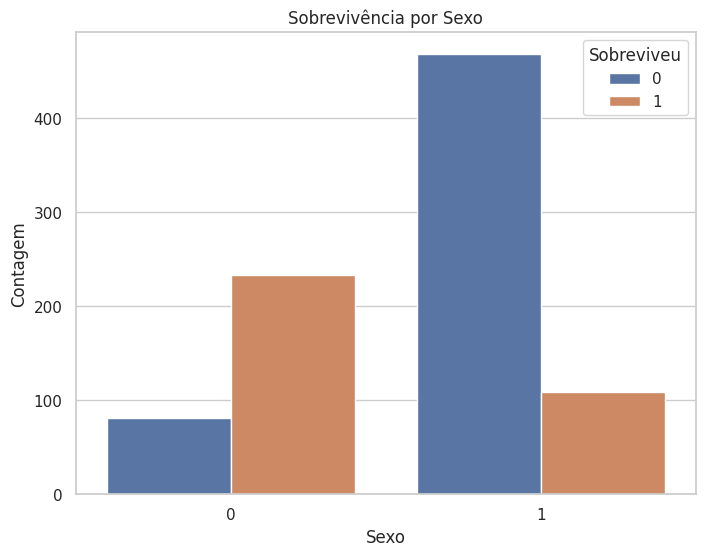

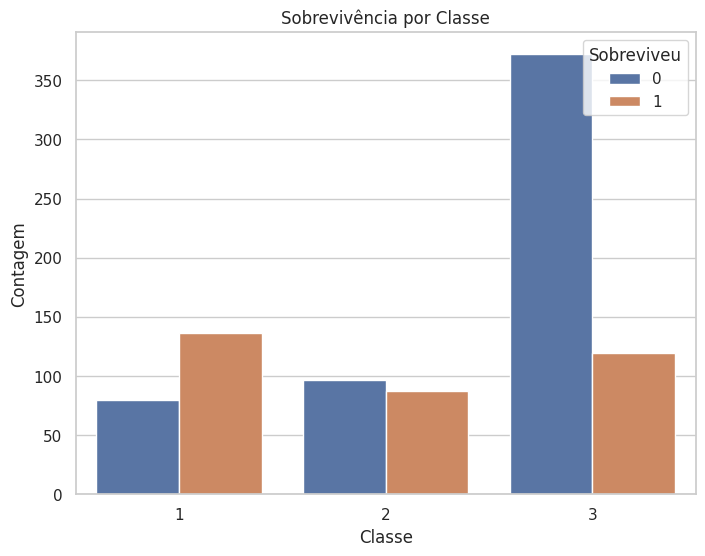

<ipython-input-2-8556bd725cad>:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Sobreviveu', loc='upper right')


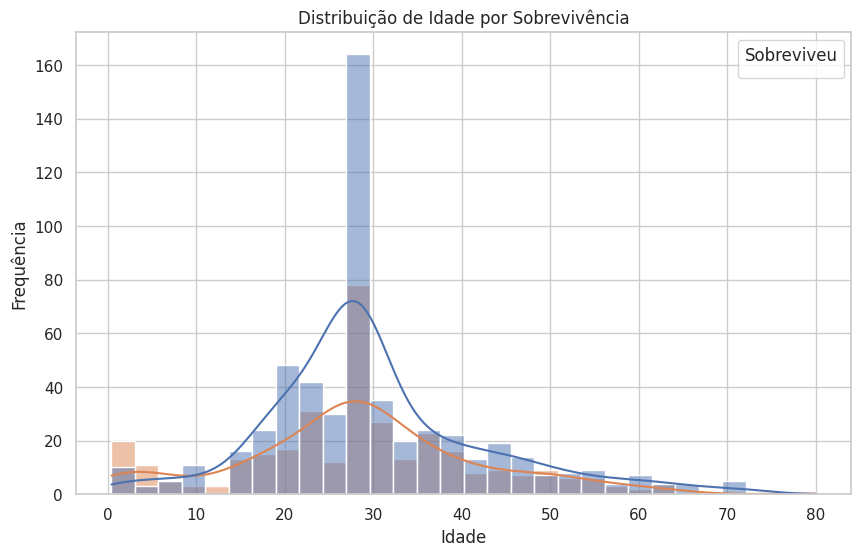

<ipython-input-2-8556bd725cad>:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Sobreviveu', loc='upper right')


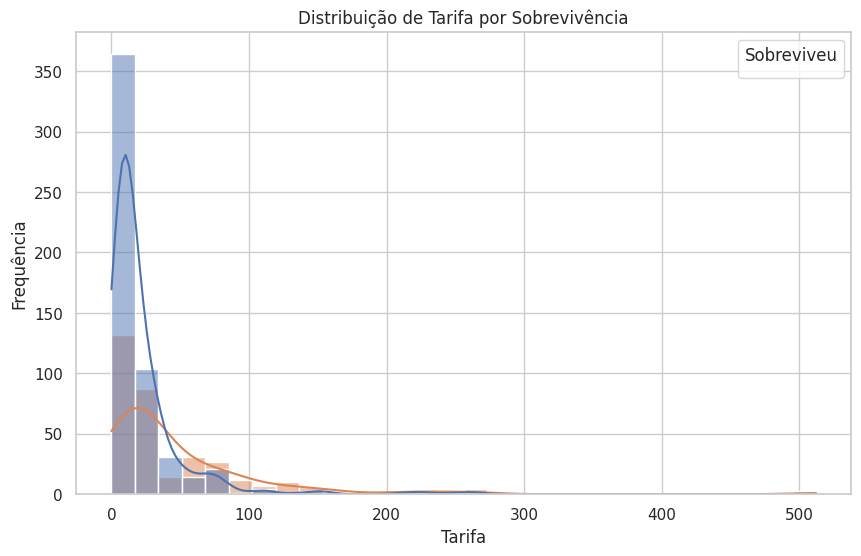

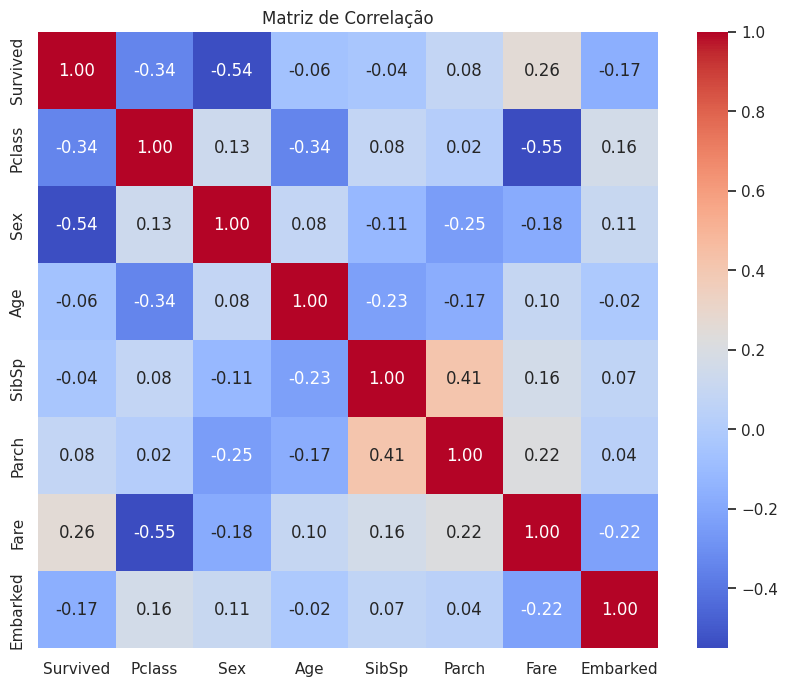

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

# Gráfico de sobrevivência por sexo
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.title('Sobrevivência por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.legend(title='Sobreviveu', loc='upper right')
plt.show()

# Gráfico de sobrevivência por classe
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.title('Sobrevivência por Classe')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.legend(title='Sobreviveu', loc='upper right')
plt.show()

# Gráfico de sobrevivência por idade
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='Age', hue='Survived', kde=True, bins=30)
plt.title('Distribuição de Idade por Sobrevivência')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.legend(title='Sobreviveu', loc='upper right')
plt.show()

# Gráfico de sobrevivência por tarifa
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='Fare', hue='Survived', kde=True, bins=30)
plt.title('Distribuição de Tarifa por Sobrevivência')
plt.xlabel('Tarifa')
plt.ylabel('Frequência')
plt.legend(title='Sobreviveu', loc='upper right')
plt.show()

# Gráfico de correlação entre as variáveis
plt.figure(figsize=(10, 8))
corr = train_data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Treinar o modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Avaliar o modelo
y_pred = model.predict(X_test)
print(f'Acurácia do modelo: {accuracy_score(y_test, y_pred):.2f}')

Acurácia do modelo: 0.80


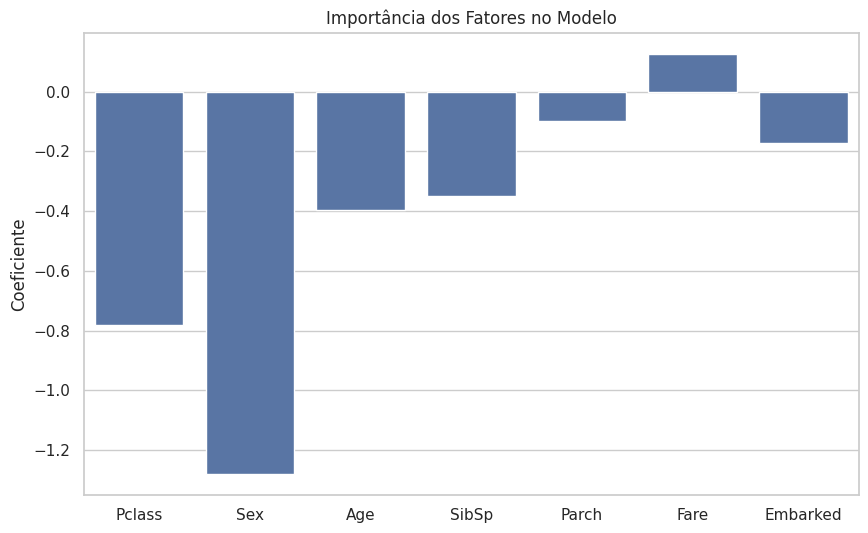

Não sobreviveu


In [ ]:
def predict_survival(pclass, sex, age, sibsp, parch, fare, embarked):
    # Converter sexo e porto de embarque para numérico
    sex = 1 if sex.lower() == 'male' else 0
    embarked = label_encoder.transform([embarked])[0]

    # Criar um DataFrame com os dados de entrada
    input_data = pd.DataFrame([[pclass, sex, age, sibsp, parch, fare, embarked]], columns=features)

    # Normalizar os dados
    input_data = scaler.transform(input_data)

    # Fazer a previsão
    prediction = model.predict(input_data)

    # Exibir gráficos adicionais
    plt.figure(figsize=(10, 6))
    sns.barplot(x=features, y=model.coef_[0])
    plt.title('Importância dos Fatores no Modelo')
    plt.ylabel('Coeficiente')
    plt.show()

    return 'Sobreviveu' if prediction[0] == 1 else 'Não sobreviveu'

# Exemplo de uso
pclass = 1
sex = 'male'
age = 30
sibsp = 0
parch = 0
fare = 50
embarked = 'S'

result = predict_survival(pclass, sex, age, sibsp, parch, fare, embarked)
print(result)

In [ ]:
import numpy as np

# Obter os coeficientes do modelo
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': features, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)

    Feature  Importance
1       Sex    1.278865
0    Pclass    0.782061
2       Age    0.395574
3     SibSp    0.349582
6  Embarked    0.170860
5      Fare    0.126216
4     Parch    0.098292


In [ ]:
def predict_survival(pclass, sex, age, sibsp, parch, fare, embarked):
    # Converter sexo e porto de embarque para numérico
    sex = 1 if sex.lower() == 'male' else 0
    embarked = label_encoder.transform([embarked])[0]

    # Criar um DataFrame com os dados de entrada
    input_data = pd.DataFrame([[pclass, sex, age, sibsp, parch, fare, embarked]], columns=features)

    # Normalizar os dados
    input_data = scaler.transform(input_data)

    # Fazer a previsão
    prediction = model.predict(input_data)

    return 'Sobreviveu' if prediction[0] == 1 else 'Não sobreviveu'

# Exemplo de uso
pclass = 1
sex = 'male'
age = 30
sibsp = 0
parch = 0
fare = 50
embarked = 'S'

result = predict_survival(pclass, sex, age, sibsp, parch, fare, embarked)
print(result)

Não sobreviveu


In [ ]:
result = predict_survival(1, 'male', 30, 0, 0, 50, 'S')
print(result)

Não sobreviveu
